In [1]:
import pySIMsalabim as sim
import os
from pySIMsalabim.experiments.EQE import *



In [2]:
# def devpar_read_from_txt(fp):
#     """Read the opened .txt file line by line and store all in a List.

#     Parameters
#     ----------
#     fp : TextIOWrapper
#         filepointer to the opened .txt file.

#     Returns
#     -------
#     List
#         List with nested lists for all parameters in all sections.
#     """
#     index = 0
#     # Reserve the first element of the list for the top/header description
#     dev_par_object = [['Description']]

#     # All possible section headers
#     section_list = ['General', 'Layers', 'Contacts', 'Optics', 'Numerical Parameters', 'Voltage range of simulation', 'User interface','Mobilities', 'Interface-layer-to-right', 'Ions', 'Generation and recombination', 'Bulk trapping']
#     for line in fp:
#         # Read all lines from the file
#         if line.startswith('**'):
#         # Left adjusted comment
#             comm_line = line.replace('*', '').strip()
#             if (comm_line in section_list):  # Does the line match a section name
#                 # New section, add element to the main list
#                 dev_par_object.append([comm_line])
#                 index += 1
#             else:
#                 # A left-adjusted comment, add with 'comm' flag to current element
#                 dev_par_object[index].append(['comm', comm_line])
#         elif line.strip() == '':
#         # Empty line, ignore and do not add to dev_par_object
#             continue
#         else:
#         # Line is either a parameter or leftover comment.
#             par_line = line.split('*')
#             if '=' in par_line[0]:  # Line contains a parameter
#                 par_split = par_line[0].split('=')
#                 par = ['par', par_split[0].strip(), par_split[1].strip(),par_line[1].strip()]
#                 dev_par_object[index].append(par)
#             else:
#                 # leftover (*) comment. Add to the description of the last added parameter
#                 dev_par_object[index][-1][3] = dev_par_object[index][-1][3] + \
#                     "*" + par_line[1].strip()
#     return dev_par_object

# def devpar_write_to_txt(dev_par_object):
#     """Convert the List object into a single string. Formatted to the device_parameter definition

#     Parameters
#     ----------
#     dev_par_object : List
#         List object with all parameters and comments.

#     Returns
#     -------
#     string
#         Formatted string for the txt file
#     """
#     par_file = []  # Initialize List to hold all lines
#     lmax = 0  # Max width of 'parameter = value' section, initialise with 0
#     section_length_max = 84 # Number of characters in the section title

#     # Description and Version
#     for item in dev_par_object[0][1:]:
#         # First element of the main object contains the top description lines. Skip very first element (Title).
#         desc_line = "** " + item[1] + '\n'
#         par_file.append(desc_line)

#     # Determine max width of the 'parameter = value' section of the txt file to align properly.
#     for sect_item in dev_par_object[1:]:
#         # Loop over all sections
#         for par_item in sect_item[1:]:
#             # Loop over all parameters
#             if par_item[0] == 'par':
#                 # Only real parameter entries need to be considered, characterised by the first list element being 'par'
#                 temp_string = par_item[1] + ' = ' + par_item[2]
#                 if len(temp_string) > lmax:
#                     # Update maxlength if length of 'par = val' combination exceeds it.
#                     lmax = len(temp_string)
#     # Add 1 to max length to allow for a empty space between 'par=val' and description.
#     lmax = lmax + 1

#     # Read every entry of the Parameter List object and create a formatted line (string) for it. Append to string List par_file.
#     for sect_element in dev_par_object[1:]:
#         # Loop over all sections. Exclude the first (Description Title) element.

#         ## Section
#         # Start with a new line before each section name. Section title must be of format **title************...
#         par_file.append('\n')
#         sec_title = "**" + sect_element[0]
#         sec_title_length = len(sec_title)
#         sec_title = sec_title + "*" * \
#             (section_length_max-sec_title_length) + '\n'
#         par_file.append(sec_title)

#         ## Parameters
#         for par_element in sect_element:
#             #  Loop over all elements in the section list, both parameters ('par') and comments ('comm')
#             if par_element[0] == 'comm':
#                 # Create string for a left-justified comment and append to string List.
#                 par_line = '** ' + par_element[1] + '\n'
#                 par_file.append(par_line)
#             elif par_element[0] == 'par':
#                 # Create string for a parameter. Format is par = val
#                 par_line = par_element[1] + ' = ' + par_element[2]
#                 par_line_length = len(par_line)
#                 # The string is filled with blank spaces until the max length is reached
#                 par_line = par_line + ' '*(lmax - par_line_length)
#                 # The description can be a multi-line description. The multiple lines are seperated by a '*'
#                 if '*' in par_element[3]:
#                     # MultiLine description. Split it and first append the par=val line as normal
#                     temp_desc = par_element[3].split('*')
#                     par_line = par_line + '* ' + temp_desc[0] + '\n'
#                     par_file.append(par_line)
#                     for temp_desc_element in temp_desc[1:]:
#                         #  For every extra comment line, fill left part of the line with empty characters and add comment/description as normal.
#                         par_line = ' '*lmax + '* ' + temp_desc_element + '\n'
#                         par_file.append(par_line)
#                 else:
#                     # Single Line description. Add 'par=val' and comment/description together, seperated by a '*'
#                     par_line = par_line + '* ' + par_element[3] + '\n'
#                     par_file.append(par_line)

#     # Join all individual strings/lines together
#     par_file = ''.join(par_file)

#     return par_file

In [3]:
# get current directory
cwd = os.getcwd()
# print(cwd)
# from pySIMsalabim.install.get_SIMsalabim import *
# install_SIMsalabim(cwd,verbose=True)
# # sim.install_fpc_Linux()
# # from pySIMsalabim.install.get_gnu_parallel import *
# # install_GNU_parallel_Linux()

# from pySIMsalabim.install.get_SIMsalabim import *
# session_path = os.path.join(cwd, 'SIMsalabim','SimSS')
# fpc_prog(session_path, 'simss', verbose = True)
# session_path = os.path.join(cwd, 'SIMsalabim','ZimT')
# fpc_prog(session_path, 'zimt', verbose = True)

max_jobs = 4
import uuid
ID = str(uuid.uuid4())

simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup.txt')
session_path = os.path.join(cwd, 'SIMsalabim','SimSS')
spectrum = os.path.join(cwd, 'SIMsalabim','Data','AM15G.txt')
lambda_min = 300
lambda_max = 800
lambda_step = 10
Vext = 0
outfile_name = ID+'_EQE.dat'
sim_type = 'simss'

# cmd_pars = [{'par': 'l2.L', 'val': '50e-9'}]
# run_EQE(simss_device_parameters, session_path, spectrum, lambda_min, lambda_max, lambda_step, Vext, outfile_name, JV_file_name = 'JV.dat', run_mode = True, parallel = True, force_multithreading = True, UUID=ID, cmd_pars=cmd_pars,max_jobs=max_jobs)

# ID2 = str(uuid.uuid4())
# outfile_name2 = ID2+'_EQE2.dat'
# cmd_pars = [{'par': 'l2.L', 'val': '300e-9'}]
# run_EQE(simss_device_parameters, session_path, spectrum, lambda_min, lambda_max, lambda_step, Vext, outfile_name2, JV_file_name = 'JV.dat', run_mode = True, parallel = True, force_multithreading = True, UUID=ID, cmd_pars=cmd_pars,max_jobs=max_jobs)
# # import pandas as pd
# plt.figure()
# df = pd.read_csv(os.path.join(session_path,outfile_name), sep = '\s+')
# plt.plot(df['lambda'],df['EQE'])

# # plt.figure()
# df2 = pd.read_csv(os.path.join(session_path,outfile_name2), sep = '\s+')
# plt.plot(df2['lambda'],df2['EQE'])
# plt.show()




./simss /home/lecorre/Desktop/pySIMsalabim/SIMsalabim/SimSS/simulation_setup.txt  -autoTidy 0 -outputRatio 0 -Vmin 0 -Vmax 0 -spectrum /home/lecorre/Desktop/pySIMsalabim/SIMsalabim/Data/AM15G.txt -JVFile /home/lecorre/Desktop/pySIMsalabim/SIMsalabim/SimSS/JV_604db84f-d051-434f-8e5d-cdad60999831.dat -logFile log_604db84f-d051-434f-8e5d-cdad60999831.txt -varFile none -scParsFile scPars_604db84f-d051-434f-8e5d-cdad60999831.txt -l2.L 50e-9
./simss /home/lecorre/Desktop/pySIMsalabim/SIMsalabim/SimSS/simulation_setup.txt  -autoTidy 0 -outputRatio 0 -Vmin 0 -Vmax 0 -spectrum /home/lecorre/Desktop/pySIMsalabim/SIMsalabim/Data/AM15G.txt -JVFile /home/lecorre/Desktop/pySIMsalabim/SIMsalabim/SimSS/JV_b20d314d-69a6-4aa7-ad56-25f1f9210502.dat -logFile log_b20d314d-69a6-4aa7-ad56-25f1f9210502.txt -varFile none -scParsFile scPars_b20d314d-69a6-4aa7-ad56-25f1f9210502.txt -l2.L 300e-9


sh: 1: cannot open /dev/tty: No such device or address
0% 0:51=0s ./simss /home/lecorre/Desktop/pySIMsalabim/SIMsalabim/SimSS/simulatiosh: 1: cannot open /dev/tty: No such device or address
0% 0:51=0s ./simss /home/lecorre/Desktop/pySIMsalabim/SIMsalabim/SimSS/simulatiosh: 1: cannot open /dev/tty: No such device or address
0% 0:51=0s ./simss /home/lecorre/Desktop/pySIMsalabim/SIMsalabim/SimSS/simulatiosh: 1: cannot open /dev/tty: No such device or address
31% 16:35=0s ./simss /home/lecorre/Desktop/pySIMsalabim/SIMsalabim/SimSS/simulatsh: 1: cannot open /dev/tty: No such device or address
sh: 1: cannot open /dev/tty: No such device or address
62% 32:19=0s ./simss /home/lecorre/Desktop/pySIMsalabim/SIMsalabim/SimSS/simulatsh: 1: cannot open /dev/tty: No such device or address
62% 32:19=0s ./simss /home/lecorre/Desktop/pySIMsalabim/SIMsalabim/SimSS/simulatsh: 1: cannot open /dev/tty: No such device or address
94% 48:3=0s ./simss /home/lecorre/Desktop/pySIMsalabim/SIMsalabim/SimSS/simulati

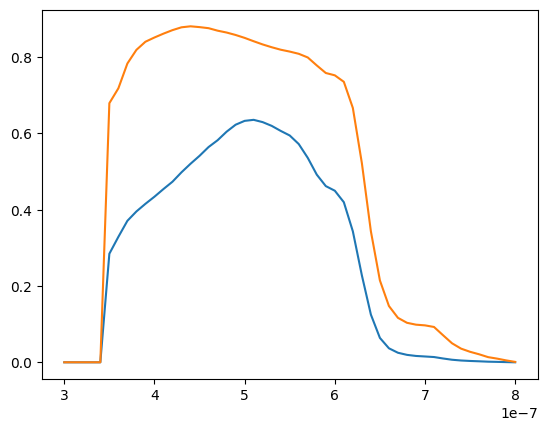

In [4]:
def run(cmd_pars,ID):
    simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup.txt')
    session_path = os.path.join(cwd, 'SIMsalabim','SimSS')
    spectrum = os.path.join(cwd, 'SIMsalabim','Data','AM15G.txt')
    lambda_min = 300
    lambda_max = 800
    lambda_step = 10
    Vext = 0
    outfile_name = ID+'_EQE.dat'
    sim_type = 'simss'

    run_EQE(simss_device_parameters, session_path, spectrum, lambda_min, lambda_max, lambda_step, Vext, outfile_name, JV_file_name = 'JV.dat', run_mode = True, parallel = True, force_multithreading = False, UUID=ID, cmd_pars=cmd_pars,max_jobs=max_jobs, threadsafe = False)

ID1 = str(uuid.uuid4())
ID2 = str(uuid.uuid4())
cmd_pars = [{'par': 'l2.L', 'val': '50e-9'}]
cmd_pars2 = [{'par': 'l2.L', 'val': '300e-9'}]

# wrap it in joblib to run in parallel
from joblib import Parallel, delayed
ID_list = [ID1,ID2]
cmd_list = [cmd_pars,cmd_pars2]
Parallel(n_jobs=2)(delayed(run)(cmd_list[i],ID_list[i]) for i in range(2))



# import pandas as pd
plt.figure()
df = pd.read_csv(os.path.join(session_path,ID1+'_EQE.dat'), sep = r'\s+')
plt.plot(df['lambda'],df['EQE'])

# plt.figure()
df2 = pd.read_csv(os.path.join(session_path,ID2+'_EQE.dat'), sep = r'\s+')
plt.plot(df2['lambda'],df2['EQE'])
plt.show()

In [5]:
# fp = open(simss_device_parameters, 'r')
# dev_par = devpar_read_from_txt(fp)
# fp.close()

print(dev_par)
# devpar_text = devpar_write_to_txt(dev_par)

# # save the dev_par to a new file
# new_file = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_new.txt')
# fp = open(new_file, 'w')
# fp.write(devpar_text)
# fp.close()

# print(dev_par)
# import uuid 
# sim.fatal_error_message(92)

# dev_par, layers = sim.load_device_parameters(session_path, simss_device_parameters, run_mode = False)

# cmd_pars = [{'par':'dev_par_file','val':simss_device_parameters},
#                     {'par':'Vmin','val':str(0)},
#                     {'par':'Vmax','val':str(0)},
#                     {'par':'l1','val':'L2_parameters.txt'},
#                     {'par':'l2','val':'L3_parameters.txt'},
#                     {'par':'l3','val':'L1_parameters.txt'}]


# def run_simulation2(sim_type, cmd_pars, session_path, parallel_safe = True, lock=None, semaphore = None, run_mode = False):
#     """Run the SIMsalabim simulation executable with the chosen device parameters. 
#         Return the complete result object of the process accompanied by a message with information, 
#         in case of both success and failure.

#     Parameters
#     ----------
#     sim_type : string
#         Which type of simulation to run: simss or zimt
#     cmd_pars : List
#         List with parameters to add to the simss/zimt cmd line. Each parameter is a dict with par,val keys. 
#         Note: when relevant the first entry must be the deviceparameters file with a key: dev_par_file
#     session_path : string
#         File path of the simss or zimt executable 
#     run_mode : boolean
#         True if function is called as part of The Shell, False when called directly. 
#         Prevents using streamlit components outside of The Shell.

#     Returns
#     -------
#     CompletedProcess
#         Output object of with returncode and console output of the simulation
#     string
#         Return message to display on the UI, for both success and failed
#     """
    
#     # Construct the command to run the executable
#     # cmd_line = construct_cmd(sim_type, cmd_pars)

#     files2copy = []
#     if parallel_safe:
#         # Acquire semaphore
#         semaphore.acquire()
#         lock.acquire()
#         # create tmp folder
#         if not os.path.exists(os.path.join(session_path,'tmp')):
#             os.makedirs(os.path.join(session_path,'tmp'))
        
#         ID = str(uuid.uuid4())
#         tmp_folder = os.path.join(session_path,'tmp',ID)
#         if not os.path.exists(tmp_folder):
#             os.makedirs(tmp_folder)


#         # start with reading dev_par_file from cmd_pars
#         for i in cmd_pars:
#             if i['par'] == 'dev_par_file':
#                 dev_par_file = i['val']
#                 break
#         # copy the dev_par_file to the tmp folder

#         files2copy.append(os.abspath(os.join(session_path,dev_par_file)))




# print(dev_par)
        

# for layer in layers:
#     print(layer[2])

NameError: name 'dev_par' is not defined

In [ ]:
# cmd_pars = [{'par':'dev_par_file','val':simss_device_parameters},
#                     {'par':'Vmin','val':str(0)},
#                     {'par':'Vmax','val':str(0)},
#                     {'par':'l1','val':'L2_parameters.txt'},
#                     {'par':'l2','val':'L3_parameters.txt'},
#                     {'par':'l3','val':'L1_parameters.txt'}]
# dev_par_keys = list(dev_par.keys())
# new_dev_par = []
# newlayers = []
# for cmd_par in cmd_pars:
#     if cmd_par['par'].startswith('l') and cmd_par['par'][1:].isdigit(): # layerfile
#         # newlayers.append(cmd_par)
#         for idx, line in enumerate(dev_par[dev_par_keys[0]]):
#             if line[0].lower() == 'layers':
#                 for pos,_ in enumerate(line[1:]):
#                     if _[0] == 'par':
#                         if _[1] == cmd_par['par']:
#                             dev_par[dev_par_keys[0]][idx][pos+1][2] = cmd_par['val']
#                             break

# print(dev_par[dev_par_keys[0]])
# # res = sim.store_file_names(dev_par, sim_type, simss_device_parameters, layers, run_mode = False)


In [ ]:
# print(res)

# layer_files = res[0]
# optical_files = res[1]
# # # make absolute paths
# layer_files = [os.path.abspath(os.path.join(session_path, f)) for f in layer_files]
# optical_files = [os.path.abspath(os.path.join(session_path, f)) for f in optical_files]
# optical_file_basenames = [os.path.basename(f) for f in optical_files]   
# traps_int_files = res[2]
# traps_bulk_files = res[3]
# traps_int_files = [os.path.abspath(os.path.join(session_path, f)) for f in traps_int_files]
# traps_bulk_files = [os.path.abspath(os.path.join(session_path, f)) for f in traps_bulk_files]
# traps_int_file_basenames = [os.path.basename(f) for f in traps_int_files]
# traps_bulk_file_basenames = [os.path.basename(f) for f in traps_bulk_files]

# ExpJV_file = None
# tj_file = None
# if sim_type == 'simss':
#     ExpJV_file = res[4]
# else:
#     tj_file = res[4]

# print(layer_files)
# print(optical_files)
# print(type(dev_par))
# print(layer)
# cmd_pars = []
# for i, dev in enumerate(dev_par.keys()):
#     if i == 0: # simulation setup
#         for idx, section in enumerate(dev_par[dev]):
#             if section[0].lower() == 'layers':
#                 for layer in dev_par[dev][idx][1:]:

#                     cmd_pars.append({'par':layer[1],'val': os.path.basename(layer[2])})
#             if section[0].lower() == 'optics':
#                 for optical in dev_par[dev][idx][1:]:
#                     if os.path.basename(optical[2]) in optical_file_basenames:
#                         cmd_pars.append({'par':optical[1],'val': os.path.basename(optical[2])})
#     else: # layer specific parameters
#         for idx, section in enumerate(dev_par[dev]):
#             if section[0].lower() == 'Generation and recombination'.lower():
#                 print('bouh')
#                 for par in dev_par[dev][idx][1:]:
#                     if os.path.basename(par[2]) in optical_file_basenames:
#                         cmd_pars.append({'par':'l'+str(i)+'.'+par[1],'val': os.path.basename(par[2])})
#             if section[0].lower() == 'Interface-layer-to-right'.lower():
#                 for par in dev_par[dev][idx][1:]:
#                     if os.path.basename(par[2]) in traps_int_file_basenames:
#                         cmd_pars.append({'par':'l'+str(i)+'.'+par[1],'val': os.path.basename(par[2])})
#             if section[0].lower() == 'Bulk trapping'.lower():
#                 for par in dev_par[dev][idx][1:]:
#                     if os.path.basename(par[2]) in traps_bulk_file_basenames:
#                         cmd_pars.append({'par':'l'+str(i)+'.'+par[1],'val': os.path.basename(par[2])})

